<img src='./figures/logo-ecole-polytechnique-ve.jpg' style='position:absolute; top:0; right:0;' width='100px' height='' alt='' />

<center>**Bachelor of Ecole Polytechnique**</center>
<center><i>Algorithms for Discrete Mathematics</i>, year 2, semester 1</center>

# Arithmetic 2: Modulos and Fermat

&nbsp;

<!--<img src="./figures/Catalan.png" alt="Roots" style="width: 350px;"/>

&nbsp;
<center><i>The <a href="https://en.wikipedia.org/wiki/Catalan_number"><b>Catalan numbers</b></a> (see the last exercise) arise when one wants to enumerate <i>binary trees</i>.</i></center>-->

## Table of contents

- [Arithmetic of square root and continued fractions](#SquareRoot)
- [Arithmetic of modulos](#Modulo)
- [The little Fermat theorem](#SmallFermat)
- [(Bonus) The Goldbach conjecture](#Goldbach)

In [4]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom2.css").read()
    return HTML(styles)
css_styling()


FileNotFoundError: [Errno 2] No such file or directory: './style/custom2.css'

In [12]:
## loading python libraries

# necessary to display plots inline:
%matplotlib inline   

# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing  
from math import *              # package for mathematics (pi, arctan, sqrt, factorial ...)


<a id="SquareRoot"></a>
## Arithmetic with matrices

The aim of this Section is to use linear algebra and python to compute <i>exact</i> expressions in Arithmetic.

<div markdown=1 class="DoIt"> **(Theory)**
1. Prove by induction that there exist integers $a_n,b_n$ such that for every $n\geq 1$
$$
(1+\sqrt{2})^n=a_n+b_n\sqrt{2}.
$$
2. Find a $2\times 2$ matrix $A$ such that
$$
\binom{a_{n+1}}{b_{n+1}}=A\times \binom{a_{n}}{b_{n}}.
$$


<div markdown=1 class="Answers"> 
1. 
2. By the above computation we have
$$
\begin{cases}
a_{n+1}&=...,\\
b_{n+1}&=...,
\end{cases}
$$
which can be written as:
$$
\binom{a_{n+1}}{b_{n+1}}=
\begin{pmatrix}
... & ...\\
... & ...
\end{pmatrix}
\times \binom{a_{n}}{b_{n}}.
$$


<div markdown=1 class="DoIt"> Using the powers of matrix $A$, write a small script which returns $a_{n},b_{n}$. <br>
<i>(Recall that a $2\times 2$ matrix can be defined by `np.matrix([[a,b],[c,d]])`.)</i><br>
Your script should return something like
```python
(1+Root(2))^100 is 5608832401712713489 + 6304837579822865708 * SquareRoot(2)
```


In [13]:
n=100
MatrixA=np.matrix([[1,2],[1,1]])
PowerofMatrix=(MatrixA**(n-1))*np.matrix([[1],[1]])
a=np.asscalar(PowerofMatrix[0])
b=np.asscalar(PowerofMatrix[1])
print('(1+Root(2))^'+str(n)+' is '+str(a)+' + '+str(b)+' * SquareRoot(2)')

# Your code here

(1+Root(2))^100 is 5608832401712713489 + 6304837579822865708 * SquareRoot(2)


<div markdown=1 class="DoIt"> 
It can be proved that
$$
a_n \stackrel{n\to +\infty}{\sim} c R^n
$$
for some constants $c,R$. 
1. Estimate $R$ numerically with a plot. Can you guess the exact value?
2. Estimate $c$ numerically.

<div markdown=1 class="Answers"><br> 
1.<br>
2.

Final value: 2.380302846916492


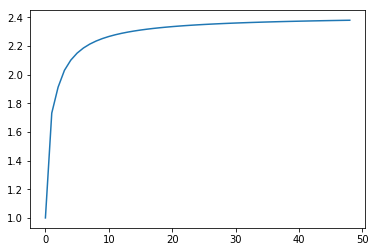

Final value: 2.380302846916492


In [15]:
# Your code here
def Coefficient_a(n):
    MatrixA=np.matrix([[1,2],[1,1]])
    PowerofMatrix=(MatrixA**(n-1))*np.matrix([[1],[1]])
    return np.asscalar(PowerofMatrix[0])

N=50
# Estimation of R:
RenormalizedValues=[Coefficient_a(n)**(1/(n+0.0)) for n in range(1,N)]
print('Final value: ' +str(RenormalizedValues[-1]) )

# Estimation of c:
#RenormalizedValues=[Coefficient_a(n)/((1+np.sqrt(2))**n) for n in range(1,N)]
plt.plot(RenormalizedValues)

plt.show()
print('Final value: '+str(RenormalizedValues[-1]))


<div markdown=1 class="DoIt"><br>

We set
$$
u_1=\frac{1}{1+1}, \quad u_2=\frac{1}{1+\frac{1}{1+1}},\quad u_3=\frac{1}{1+\frac{1}{1+\frac{1}{1+1}}}, \quad u_4=\frac{1}{1+\frac{1}{1+\frac{1}{1+\frac{1}{1+1}}}}, \dots
$$

1. **(Theory)** Let us write $u_n$ as an integer ratio $u_n=a_n/b_n$ (for example $a_1=1,b_1=2$, you can check $a_3=3,b_3=5$). Find a $2\times 2$ matrix $B$ such that
$$
\binom{a_{n+1}}{b_{n+1}}=B\times \binom{a_{n}}{b_{n}}.
$$
<i>(Hint: Find a simple relation between $u_{n+1}$ and $u_n$.)</i>
2. <b>(Application)</b> Compute the exact value (as a fraction) of
$$
r=\frac{1}{1+\frac{1}{1+\frac{1}{1+\frac{1}{1+\frac{1}{1+\frac{1}{1+\frac{1}{1+\frac{1}{1+\frac{1}{1+\frac{1}{1+1}}}}}}}}}}.
$$

3. **(Side question)** Compute a numerical evaluation of $1+r$. Does it look familiar?

<div markdown=1 class="Answers"> 
1. 
2. 
3. 

In [16]:
# Script for Question 2.

MatrixB=np.matrix([[0,1],[1,1]])
PowerofMatrix=(MatrixB**(9))*np.matrix([[1],[2]])
a=np.asscalar(PowerofMatrix[0])
b=np.asscalar(PowerofMatrix[1])
print('-----------')
print('Question 2:')
print('r =' +str(a)+' / '+str(b))

# Script for Question 3.
print('-----------')
print('Question 3:')
print('1+r = ' +str(1+(a+0.0)/b))




-----------
Question 2:
r =89 / 144
-----------
Question 3:
1+r = 1.6180555555555556


<a id="Modulo"></a>
## Arithmetic of modulos

<!--Recall the <i>modulo</i> notation: we write

$$
a\equiv b\ (\mathrm{mod}\ n)
$$

if $a-b$ is a multiple of $n$, <i>i.e.</i> if there is an integer $k$ such that $a=b+kn$. Recall the two following rules:

1. (Compatibility with addition)

$$
\begin{cases}
a\equiv b &(\mathrm{mod}\ n)\\
x\equiv y &(\mathrm{mod}\ n)
\end{cases}
\Rightarrow a+x\equiv b+y\ (\mathrm{mod}\ n)
$$
1. (Compatibility with product)

$$
\begin{cases}
a\equiv b &(\mathrm{mod}\ n)\\
x\equiv y &(\mathrm{mod}\ n)
\end{cases}
\Rightarrow ax\equiv by\ (\mathrm{mod}\ n)
$$-->

<div markdown=1 class="DoIt"> 
Write a script which computes $38911^{21025413}\ (\mathrm{mod}\ 188)$. (Explain in the cell below the successive steps.)


In [23]:
# Your code here
k=38911%188
print('38911 = '+str(k)+ ' mod(188) =:k')
FoundAPeriod=False
i=0
while FoundAPeriod == False:
    i=i+1
    remainder = (k**i)%188
    print('for i='+str(i)+' we have k**i mod(188) = '+str(remainder))
    if remainder == 1:
        FoundAPeriod = True

print('We have that 21025413%'+str(i)+' = '+str(21025413%i))    
print('The final answer is '+str(k)+'**'+str(21025413%i)+' (mod 188) ='+str((183**9)%188))


38911 = 183 mod(188) =:k
for i=1 we have k**i mod(188) = 183
for i=2 we have k**i mod(188) = 25
for i=3 we have k**i mod(188) = 63
for i=4 we have k**i mod(188) = 61
for i=5 we have k**i mod(188) = 71
for i=6 we have k**i mod(188) = 21
for i=7 we have k**i mod(188) = 83
for i=8 we have k**i mod(188) = 149
for i=9 we have k**i mod(188) = 7
for i=10 we have k**i mod(188) = 153
for i=11 we have k**i mod(188) = 175
for i=12 we have k**i mod(188) = 65
for i=13 we have k**i mod(188) = 51
for i=14 we have k**i mod(188) = 121
for i=15 we have k**i mod(188) = 147
for i=16 we have k**i mod(188) = 17
for i=17 we have k**i mod(188) = 103
for i=18 we have k**i mod(188) = 49
for i=19 we have k**i mod(188) = 131
for i=20 we have k**i mod(188) = 97
for i=21 we have k**i mod(188) = 79
for i=22 we have k**i mod(188) = 169
for i=23 we have k**i mod(188) = 95
for i=24 we have k**i mod(188) = 89
for i=25 we have k**i mod(188) = 119
for i=26 we have k**i mod(188) = 157
for i=27 we have k**i mod(188) = 155
f

<div markdown=1 class="Answers"> 

<a id="SmallFermat"></a>
# The little Fermat theorem

The "little" Fermat Theorem states the following:<br><br>
**Theorem**<br>
<i> Let $p$ be a prime number. 
For every integer $1\leq a<p$, we have
<br>
$$
a^{p-1}\equiv 1 (\mathrm{mod}\ p).
$$ 
</i>

<br>
<font size="-1">(In the sequel we will use the above formulation rather than "for every $a\geq 0$, we have $a^{p}\equiv a (\mathrm{mod}\ p)$".)</font>

<div markdown=1 class="DoIt"> 
Write a script which checks that the little Fermat Theorem is true for $p=17$.

In [26]:
p=17
Check=True
for a in range(1,p):
    Value= a**(p-1)%p
    print('for a = '+str(a)+', a^{p-1} mod p ='+str(Value))
    if Value != 1:
        Check=False
if Check==True:
    print('Fermat theorem is true for n = '+str(p))
else:
    print('Fermat theorem is not true for n = '+str(p))     
     # Your code here

for a = 1, a^{p-1} mod p =1
for a = 2, a^{p-1} mod p =1
for a = 3, a^{p-1} mod p =1
for a = 4, a^{p-1} mod p =1
for a = 5, a^{p-1} mod p =1
for a = 6, a^{p-1} mod p =1
for a = 7, a^{p-1} mod p =1
for a = 8, a^{p-1} mod p =1
for a = 9, a^{p-1} mod p =1
for a = 10, a^{p-1} mod p =1
for a = 11, a^{p-1} mod p =1
for a = 12, a^{p-1} mod p =1
for a = 13, a^{p-1} mod p =1
for a = 14, a^{p-1} mod p =1
for a = 15, a^{p-1} mod p =1
for a = 16, a^{p-1} mod p =1
Fermat theorem is true for n = 17


We say that $n$ is <i>composite</i> if $n$ is not prime. The contraposition of the little Fermat Theorem is very useful: it says that<br>
$$
\left(\text{there exists $a<p$ such that } a^{p-1}\not\equiv 1\ (\mathrm{mod}\ n) \right)\Rightarrow p\text{ is composite}.
$$
<br>
In this case, we say that $a$ is a <i>Fermat witness</i> for (the non-primeness of) $p$. For example, you can check that<br>
$$
2^{15-1}=16384\equiv 4\ (\mathrm{mod}\ 15) \not\equiv 1 (\mathrm{mod}\ 15)
$$
<br>
(and of course $15$ is composite). Therefore $a=2$ is a Fermat witness for $p=15$, and this is a (somehow convoluted) proof of the fact that $15$ is composite.


<div markdown=1 class="DoIt"> 
1. Check that for every composite $n\leq 60$ then $a=2$ is a Fermat witness for $n$. The output should look like
```python
n = 2 is prime
n = 3 is prime
n = 4 is composite and 2 is a Fermat witness
n = 5 is prime
n = 6 is composite and 2 is a Fermat witness
...
```
<i>(You can copy/paste your function `IsPrime()` from Notebook 1.)</i>
2. Find the smallest composite $n$ such that $a=2$ is not a Fermat witness for $n$.
3. Same question with $a=3$.


In [5]:
# Question 1

# Your code here

# Question 2    

# Your code here


<div markdown=1 class="DoIt"> 
Find the smallest Fermat witness which proves that $1105$ is not prime.


In [6]:
# Your code here

<a id="FermatPrimes"></a>
## Fermat prime numbers

A <i>Fermat number</i> is an integer of the form $F_n=2^{2^n}+1$ for some $n\geq 0$. First Fermat numbers are given by 
<br> 
$$
F_0=2^1+1=3,\quad F_1=2^2+1=5,\quad F_2=2^4+1=17,\quad, F_3=2^8+1=257.
$$

<div markdown=1 class="DoIt"> 
Fermat conjectured that every Fermat number is prime. Can you test his conjecture up to $n=8$? 

In [7]:
# Your code here

<a id="Goldbach"></a>
## (Bonus) The Goldbach conjecture

Goldbach's conjecture is one of the most famous unsolved problems in number theory. It states that
<br><br>
<center>
    <i>Every even integer $\geq 2$ can be written as the sum of two primes.</i>
</center>
<br>
We will try to check the conjecture.

<div markdown=1 class="DoIt"> Write a script which checks the conjecture for every $M\leq n \leq N$ (and returns a decomposition for every $n$).
<br><br>
For $M=60,N=70$ you should get something like
```python
For n = 60, we have 60 = 7 + 53, Goldbach is true
For n = 62, we have 62 = 3 + 59, Goldbach is true
For n = 64, we have 64 = 3 + 61, Goldbach is true
For n = 66, we have 66 = 5 + 61, Goldbach is true
For n = 68, we have 68 = 7 + 61, Goldbach is true
For n = 70, we have 70 = 3 + 67, Goldbach is true
```

In [8]:
# Your code here